In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import nltk
from os import listdir
from os.path import isfile, join


sns.set(rc={'figure.figsize':(15,8.27)})
sns.set(style="whitegrid")

In [7]:
base_data_dir = '../data/ftp.mokk.bme.hu/Hunglish2'
example_file_path = join(base_data_dir, 'classic.lit', 'bi', 'Andersen_1.bi')
domains = [
    'classic.lit',
    'law',
    'modern.lit',
    'softwaredocs',
    'subtitles'
]

## Notes
### Law folder is not in the same structure as the others
 Copied files from law/nonagg/1/bi and law/nonagg/2 to law/bi

In [8]:
def dump_domain_content_to_file(sentences, domain):
    with open(f'{domain}.txt', 'w+') as f:
        for sentence_pair in sentences:
            f.write('\t'.join(sentence_pair)+'\n')

In [9]:
sentence_pairs = []
malformed_lines = {}
for domain in domains: 
    # domain = domains[0]
    domain_path = f'{base_data_dir}/{domain}/bi'
    files = [f for f in listdir(f'{domain_path}') if isfile(join(f'{domain_path}', f))]
    for file in files:
        with open(f'{domain_path}/{file}', 'r', encoding='latin2') as f:
            for line in f:
                try:
                    hun_eng_sentence_pair = line.rstrip('\n').split('\t')
                    hun_eng_sentence_pair.append(domain)
                    if len(hun_eng_sentence_pair) != 3: # hun-eng-dom
                        raise ValueError(f'Hun-eng sentence pair {hun_eng_sentence_pair} has bad formatting')
                    sentence_pairs.append(hun_eng_sentence_pair)
                except:
                    if domain not in malformed_lines:
                        malformed_lines[domain] = []
                    malformed_lines[domain].append((f'line: {line}', f'file: {file}'))

## Check lines where we could not separate by \t

In [10]:
print(json.dumps(malformed_lines, sort_keys=True, indent=2))

{}


In [11]:
# use this to concat separate files to a single domain-specific file
dump_domain_content_to_file(sentence_pairs, domain)

In [12]:
print(json.dumps({domain: len(malformed_lines[domain]) for domain in malformed_lines}, sort_keys=True, indent=2))

{}


In [13]:
sentence_pairs[:10]

[['', '', 'classic.lit'],
 ['A beszéd látásom ikre, mely képtelen magát megmérni, Folyton dacol velem, gúnyosan mondja: Walt, elég van benned, miért nem tárod fel?',
  "Speech is the twin of my vision, it is unequal to measure itself, It provokes me forever, it says sarcastically, Walt you contain enough, why don't you let it out then?",
  'classic.lit'],
 ['A csónakosok és búvárok korán keltek és megvártak engem, Nadrágszáramat csizmába gyűrtem és mentem és jól töltöttem az időt, Te is velünk lehettél volna aznap a halasbogrács körül.',
  "The boatmen and clam-diggers arose early and stopt for me, I tuck'd my trowser-ends in my boots and went and had a good time; You should have been with us that day round the chowder-kettle.",
  'classic.lit'],
 ['A folyam árját tarkázó fény és homály földje!',
  'Earth of shine and dark mottling the tide of the river!',
  'classic.lit'],
 ['Agyam, a te titkos tekervényeid legyenek azok!',
  'My brain it shall be your occult convolutions!',
  'classi

In [14]:
len(sentence_pairs)

4153369

In [15]:
df = pd.DataFrame(sentence_pairs, columns=['hun', 'eng', 'domain'])

In [16]:
df

,hun,eng,domain
0,,,classic.lit
1,"A beszéd látásom ikre, mely képtelen magát meg...","Speech is the twin of my vision, it is unequal...",classic.lit
2,A csónakosok és búvárok korán keltek és megvár...,The boatmen and clam-diggers arose early and s...,classic.lit
3,A folyam árját tarkázó fény és homály földje!,Earth of shine and dark mottling the tide of t...,classic.lit
4,"Agyam, a te titkos tekervényeid legyenek azok!",My brain it shall be your occult convolutions!,classic.lit
...,...,...,...
4153364,Zsoldos?,Mercenary?,subtitles
4153365,Zsúfolt hely.,Crowded.,subtitles
4153366,Zsugori geci.,"""Early Girl.""",subtitles
4153367,"Zsugoriság... akasztás, önpusztítás.","Avarice... hanging, self-destruction.",subtitles


In [17]:
df['hun_len_word'] = df['hun'].apply(lambda x: len(x.split()))
df['eng_len_word'] = df['eng'].apply(lambda x: len(x.split()))
df['hun_len_char'] = df['hun'].apply(len)
df['eng_len_char'] = df['eng'].apply(len)
df['hun_eng_len_diff_word'] = abs(df['hun_len_word'] - df['eng_len_word'])
df['hun_eng_len_diff_char'] = abs(df['hun_len_char'] - df['eng_len_char'])
df['hun_eng_len_ratio_word'] = df['hun_len_word'] / df['eng_len_word']
df['hun_eng_len_ratio_char'] = df['hun_len_char'] / df['eng_len_char']
df = df[df['hun_eng_len_ratio_word'].notna()]

In [18]:
df

,hun,eng,domain,hun_len_word,eng_len_word,hun_len_char,eng_len_char,hun_eng_len_diff_word,hun_eng_len_diff_char,hun_eng_len_ratio_word,hun_eng_len_ratio_char
1,"A beszéd látásom ikre, mely képtelen magát meg...","Speech is the twin of my vision, it is unequal...",classic.lit,21,31,134,168,10,34,0.677419,0.797619
2,A csónakosok és búvárok korán keltek és megvár...,The boatmen and clam-diggers arose early and s...,classic.lit,28,35,180,189,7,9,0.800000,0.952381
3,A folyam árját tarkázó fény és homály földje!,Earth of shine and dark mottling the tide of t...,classic.lit,8,11,45,55,3,10,0.727273,0.818182
4,"Agyam, a te titkos tekervényeid legyenek azok!",My brain it shall be your occult convolutions!,classic.lit,7,8,46,46,1,0,0.875000,1.000000
5,A haldoklóval halok én és a most fürdetett újs...,I pass death with the dying and birth with the...,classic.lit,38,44,230,236,6,6,0.863636,0.974576
...,...,...,...,...,...,...,...,...,...,...,...
4153364,Zsoldos?,Mercenary?,subtitles,1,1,8,10,0,2,1.000000,0.800000
4153365,Zsúfolt hely.,Crowded.,subtitles,2,1,13,8,1,5,2.000000,1.625000
4153366,Zsugori geci.,"""Early Girl.""",subtitles,2,2,13,13,0,0,1.000000,1.000000
4153367,"Zsugoriság... akasztás, önpusztítás.","Avarice... hanging, self-destruction.",subtitles,3,3,36,37,0,1,1.000000,0.972973


In [19]:
def get_basic_stats(metric_dict, col):
    metric_dict['q0.25'] = str(df[col].quantile(q=0.25))
    metric_dict['q0.5'] = str(df[col].quantile(q=0.5))
    metric_dict['q0.75'] = str(df[col].quantile(q=0.75))
    metric_dict['q0.99'] = str(df[col].quantile(q=0.99))
    metric_dict['q0.999'] = str(df[col].quantile(q=0.999))
    metric_dict['min'] = str(df[col].min())
    metric_dict['max'] = str(df[col].max())
    metric_dict['mean'] = str(df[col].mean())
    metric_dict['stdev'] = str(df[col].std())
    
    return metric_dict

def get_len_metrics(df):
    metrics = {}
    for mode in ['word', 'char']:
        metrics[mode] = {}
        for language in ['hun', 'eng']:
            col = f'{language}_len_{mode}'
            metrics[mode][language] = {}
            metrics[mode][language] = get_basic_stats(metrics[mode][language], col)
        
        metrics[mode]['hun_eng_len_diff'] = {}
        metrics[mode]['hun_eng_len_diff'] = get_basic_stats(metrics[mode]['hun_eng_len_diff'], f'hun_eng_len_diff_{mode}')
        metrics[mode]['hun_eng_len_ratio'] = {}
        metrics[mode]['hun_eng_len_ratio'] = get_basic_stats(metrics[mode]['hun_eng_len_ratio'], f'hun_eng_len_ratio_{mode}')
        
    return metrics

In [20]:
len_metrics = get_len_metrics(df)
print(json.dumps(len_metrics, sort_keys=True, indent=4))

{
    "char": {
        "eng": {
            "max": "4000",
            "mean": "90.00507011796064",
            "min": "0",
            "q0.25": "27.0",
            "q0.5": "57.0",
            "q0.75": "116.0",
            "q0.99": "487.0",
            "q0.999": "1126.0",
            "stdev": "110.6403049301591"
        },
        "hun": {
            "max": "4000",
            "mean": "91.13784360619458",
            "min": "0",
            "q0.25": "27.0",
            "q0.5": "57.0",
            "q0.75": "115.0",
            "q0.99": "505.0",
            "q0.999": "1172.0",
            "stdev": "114.60849002348625"
        },
        "hun_eng_len_diff": {
            "max": "1066",
            "mean": "11.291875211254915",
            "min": "0",
            "q0.25": "3.0",
            "q0.5": "7.0",
            "q0.75": "15.0",
            "q0.99": "66.0",
            "q0.999": "127.0",
            "stdev": "14.45721411335648"
        },
        "hun_eng_len_ratio": {
            "

## Sample sentence length distribution - word and character level

[Text(0.5, 0, 'ENG - Sentence length (char)'), Text(0, 0.5, 'Frequency')]

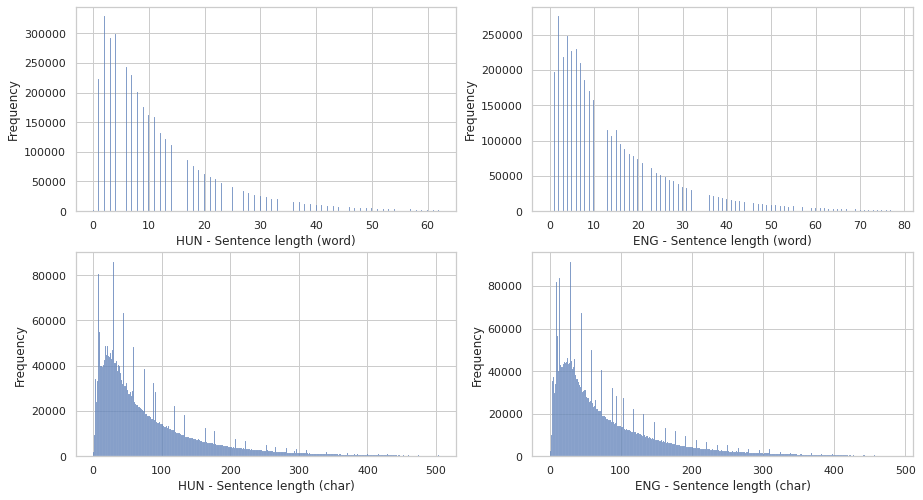

In [21]:
fig, axs = plt.subplots(2,2)

sns.histplot(df[df['hun_len_word'] < int(float(len_metrics['word']['hun']['q0.99']))]['hun_len_word'], ax=axs[0, 0])
axs[0, 0].set(xlabel='HUN - Sentence length (word)', ylabel='Frequency')

sns.histplot(df[df['eng_len_word'] < int(float(len_metrics['word']['eng']['q0.99']))]['eng_len_word'], ax=axs[0, 1])
axs[0, 1].set(xlabel='ENG - Sentence length (word)', ylabel='Frequency')

sns.histplot(df[df['hun_len_char'] < int(float(len_metrics['char']['hun']['q0.99']))]['hun_len_char'], ax=axs[1, 0])
axs[1, 0].set(xlabel='HUN - Sentence length (char)', ylabel='Frequency')

sns.histplot(df[df['eng_len_char'] < int(float(len_metrics['char']['eng']['q0.99']))]['eng_len_char'], ax=axs[1, 1])
axs[1, 1].set(xlabel='ENG - Sentence length (char)', ylabel='Frequency')




## Hun-Eng length difference distribution

[Text(0.5, 0, 'Hun-Eng length ratio (char)'), Text(0, 0.5, 'Frequency')]

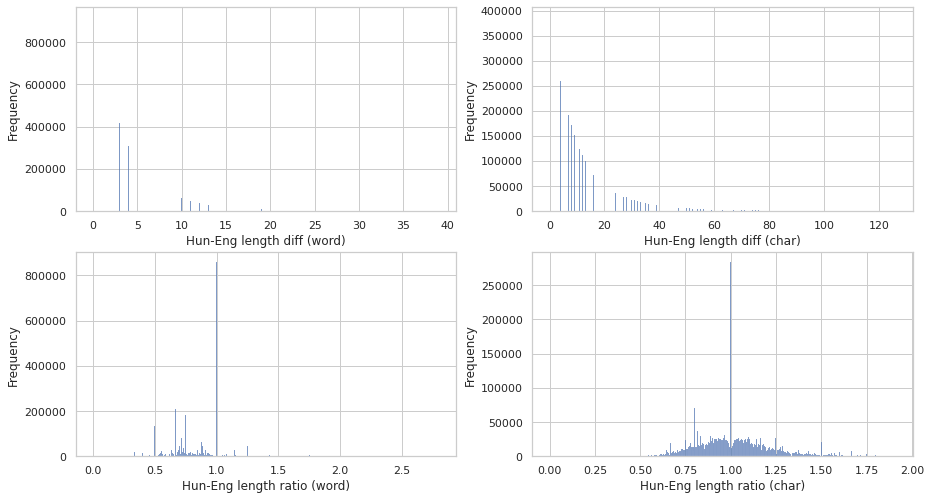

In [22]:
fig, axs = plt.subplots(2,2)

sns.histplot(df[df['hun_eng_len_diff_word'] < int(float(len_metrics['word']['hun_eng_len_diff']['q0.999']))]['hun_eng_len_diff_word'], ax=axs[0, 0])
axs[0, 0].set(xlabel='Hun-Eng length diff (word)', ylabel='Frequency')

sns.histplot(df[df['hun_eng_len_diff_char'] < int(float(len_metrics['char']['hun_eng_len_diff']['q0.999']))]['hun_eng_len_diff_char'], ax=axs[0, 1])
axs[0, 1].set(xlabel='Hun-Eng length diff (char)', ylabel='Frequency')

sns.histplot(df[df['hun_eng_len_ratio_word'] < int(float(len_metrics['word']['hun_eng_len_ratio']['q0.999']))]['hun_eng_len_ratio_word'], ax=axs[1, 0])
axs[1, 0].set(xlabel='Hun-Eng length ratio (word)', ylabel='Frequency')

sns.histplot(df[df['hun_eng_len_ratio_char'] < int(float(len_metrics['char']['hun_eng_len_ratio']['q0.999']))]['hun_eng_len_ratio_char'], ax=axs[1, 1])
axs[1, 1].set(xlabel='Hun-Eng length ratio (char)', ylabel='Frequency')

## Domain distribution

In [23]:
freqs = df[['hun', 'domain']].groupby('domain').count().reset_index()
freqs

,domain,hun
0,classic.lit,652010
1,law,1349914
2,modern.lit,1670073
3,softwaredocs,135463
4,subtitles,343331


4150791


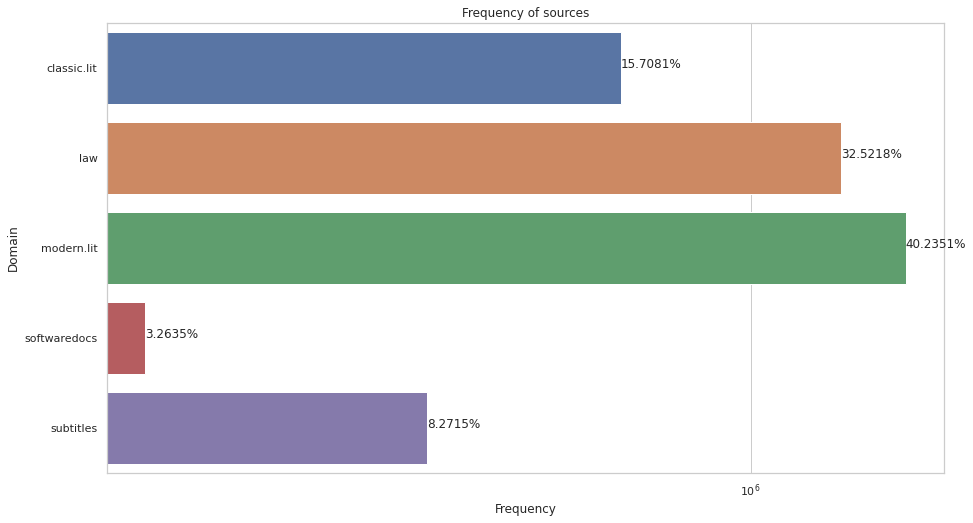

In [24]:
ax = sns.barplot(x='hun' ,y='domain', data=freqs)
ax.set_xscale("log")
ax.set_title('Frequency of sources')
ax.set(xlabel='Frequency', ylabel='Domain')

total = freqs['hun'].sum()
print(total)
for p in ax.patches:
        percentage = '{:.4f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

### Category distribution does not match original
Original distribution: http://mokk.bme.hu/resources/hunglishcorpus/


In [22]:
# num of bisentences
total = 4151
reported_cnts = {
    'modern.lit': 1670,
    'classical.lit': 652,
    'subtitles': 343,
    'softwaredocs': 135,
    'law': 1351
}
reported_ratios = {domain: reported_cnts[domain]/total for domain in reported_cnts}
print(json.dumps(reported_ratios, sort_keys=True, indent=2))

{
  "classical.lit": 0.15707058540110816,
  "law": 0.3254637436762226,
  "modern.lit": 0.40231269573596723,
  "softwaredocs": 0.032522283787039266,
  "subtitles": 0.08263069139966273
}


## Vocabulary

In [43]:
def get_vocab(corpus, n_gram=1):
    """
    corpus: list of sentences
    """
    vocab_dict = {}
    if n_gram == 1:
        for sentence in corpus:
            words = sentence.split()
            for word in words:
                word = word.lower()
                if word not in vocab_dict:
                    vocab_dict[word] = 1
                else:
                    vocab_dict[word] += 1
    elif n_gram == 2:
        for sentence in corpus:
            bigrams = tuple(nltk.bigrams(sentence.split()))
            for bigram in bigrams:
                bigram = tuple(x.lower() for x in bigram)
                if bigram not in vocab_dict:
                    vocab_dict[bigram] = 1
                else:
                     vocab_dict[bigram] += 1
    elif n_gram == 3:
        for sentence in corpus:
            trigrams = tuple(nltk.trigrams(sentence.split()))
            for trigram in trigrams:
                trigram = tuple(x.lower() for x in trigram)
                if trigram not in vocab_dict:
                    vocab_dict[trigram] = 1
                else:
                     vocab_dict[trigram] += 1
                        
    return vocab_dict  

hun_sentences = [item[0] for item in sentence_pairs]
eng_sentences = [item[1] for item in sentence_pairs]

In [48]:
hun_vocab = get_vocab(hun_sentences)
eng_vocab = get_vocab(eng_sentences)
hun_bigrams = get_vocab(hun_sentences, 2)
eng_bigrams = get_vocab(eng_sentences, 2)

In [49]:
print(f'Hun vocab size: {len(hun_vocab)}\nEng vocab size: {len(eng_vocab)}')

Hun vocab size: 1626335
Eng vocab size: 682842


In [50]:
sorted(((v,k) for k,v in eng_vocab.items()), reverse=True)

[(2180602, 'the'),
 (977697, 'of'),
 (956976, 'and'),
 (914943, 'to'),
 (751239, 'a'),
 (571415, 'in'),
 (445634, 'he'),
 (421078, 'was'),
 (412475, 'i'),
 (369362, 'that'),
 (308187, 'it'),
 (302266, 'you'),
 (301204, 'his'),
 (274570, 'for'),
 (256544, 'had'),
 (249755, 'with'),
 (222889, 'on'),
 (217174, 'as'),
 (214664, 'be'),
 (205903, 'at'),
 (200248, 'is'),
 (193841, 'not'),
 (180935, 'she'),
 (175182, 'but'),
 (159319, 'this'),
 (156476, 'her'),
 (155056, 'they'),
 (154502, 'have'),
 (142509, 'from'),
 (128513, 'my'),
 (126839, 'by'),
 (125444, 'all'),
 (125337, '-'),
 (119875, 'were'),
 (113828, 'or'),
 (107397, 'no'),
 (105223, 'said'),
 (101772, 'what'),
 (101482, 'we'),
 (98252, 'one'),
 (96894, 'if'),
 (95983, 'are'),
 (95123, 'would'),
 (93203, 'an'),
 (90640, 'which'),
 (89547, 'him'),
 (89182, 'there'),
 (87949, 'been'),
 (87778, 'out'),
 (83888, 'so'),
 (80238, 'into'),
 (79240, 'when'),
 (77996, 'me'),
 (77768, 'could'),
 (77671, 'your'),
 (77631, 'their'),
 (73621, '

In [51]:
sorted(((v,k) for k,v in hun_vocab.items()), reverse=True)

[(2272769, 'a'),
 (806688, 'az'),
 (669638, 'és'),
 (597480, '-'),
 (488724, 'hogy'),
 (432359, 'nem'),
 (284872, 'egy'),
 (202904, 'is'),
 (184079, 'de'),
 (136773, 'ha'),
 (132292, 'meg'),
 (121061, 'csak'),
 (121022, 'ez'),
 (114975, 'még'),
 (111107, 'volt'),
 (102784, 'azt'),
 (96652, 'már'),
 (96259, 'vagy'),
 (95871, 's'),
 (94607, 'mint'),
 (79102, 'kell'),
 (74267, 'sem'),
 (68071, 'mondta'),
 (67340, 'úgy'),
 (64606, 'én'),
 (63404, 'van'),
 (62858, 'el'),
 (61596, 'olyan'),
 (59057, 'most'),
 (57395, 'ezt'),
 (56857, 'amikor'),
 (55909, 'minden'),
 (55264, 'ki'),
 (55226, 'mi'),
 (51566, 'volt,'),
 (49458, 'akkor'),
 (47994, 'volna'),
 (45854, 'mert'),
 (45206, 'ő'),
 (45010, 'aki'),
 (41117, 'majd'),
 (40323, 'aztán'),
 (39369, 'itt'),
 (37958, 'amit'),
 (37628, 'két'),
 (37609, 'így'),
 (37046, 'mit'),
 (35933, 'nagyon'),
 (35064, 'valami'),
 (34928, 'ne'),
 (34680, 'ott'),
 (34227, 'pedig'),
 (33171, 'nagy'),
 (32310, 'maga'),
 (31718, 'mintha'),
 (30818, 'mindig'),
 (303

In [52]:
sorted(((v,k) for k,v in hun_bigrams.items()), reverse=True)

[(78988, ('és', 'a')),
 (63846, ('hogy', 'a')),
 (38920, ('ez', 'a')),
 (37166, ('-', 'mondta')),
 (26172, ('hogy', 'az')),
 (25434, ('és', 'az')),
 (25383, ('meg', 'a')),
 (24573, ('-', 'a')),
 (23139, ('az', 'a')),
 (21370, ('ezt', 'a')),
 (21061, ('nem', 'is')),
 (20554, ('volt', 'a')),
 (20162, ('mint', 'a')),
 (19145, ('nem', 'volt')),
 (18282, ('-', 'nem')),
 (15407, ('de', 'a')),
 (14519, ('de', 'nem')),
 (14148, ('ez', 'az')),
 (14112, ('hogy', 'nem')),
 (13899, ('ha', 'a')),
 (13416, ('az', 'egyik')),
 (13243, ('csak', 'a')),
 (12621, ('az', 'egész')),
 (11948, ('-', 'az')),
 (11867, ('és', 'nem')),
 (11740, ('az', 'első')),
 (11686, ('el', 'a')),
 (11611, ('azt', 'a')),
 (11494, ('még', 'mindig')),
 (11466, ('-', 'de')),
 (11334, ('s', 'a')),
 (11249, ('ki', 'a')),
 (11235, ('az', 'európai')),
 (10943, ('-', 'kérdezte')),
 (10757, ('-', 'és')),
 (10563, ('a', 'bizottság')),
 (10342, ('mint', 'egy')),
 (10204, ('a', 'két')),
 (9877, ('az', 'ő')),
 (9780, ('az', 'én')),
 (9709,

In [53]:
sorted(((v,k) for k,v in eng_bigrams.items()), reverse=True)

[(268067, ('of', 'the')),
 (165344, ('in', 'the')),
 (118151, ('to', 'the')),
 (87243, ('on', 'the')),
 (70647, ('and', 'the')),
 (67029, ('it', 'was')),
 (60190, ('at', 'the')),
 (54425, ('to', 'be')),
 (54111, ('for', 'the')),
 (48640, ('from', 'the')),
 (47619, ('he', 'was')),
 (43622, ('with', 'the')),
 (43047, ('he', 'had')),
 (42637, ('in', 'a')),
 (40374, ('of', 'a')),
 (38596, ('was', 'a')),
 (37953, ('by', 'the')),
 (35265, ('had', 'been')),
 (33676, ('with', 'a')),
 (31929, ('into', 'the')),
 (30998, ('out', 'of')),
 (29670, ('of', 'his')),
 (29398, ('that', 'the')),
 (28891, ('there', 'was')),
 (27555, ('for', 'a')),
 (25224, ('shall', 'be')),
 (24184, ('it', 'is')),
 (24122, ('in', 'his')),
 (22992, ('and', 'i')),
 (22970, ('i', 'was')),
 (22569, ('that', 'he')),
 (22515, ('all', 'the')),
 (22087, ('one', 'of')),
 (20750, ('and', 'he')),
 (20438, ('they', 'were')),
 (20208, ('was', 'the')),
 (19789, ('she', 'was')),
 (19357, ('did', 'not')),
 (19085, ('i', 'have')),
 (18760